Assignment 10
===================

Name : Nihar Kanungo Batch : 6:30 AM , Sunday

Background :
--------------
Artificial Intelligence has been evolved and gone through many variety of changes in the recent past. The methods which we were using before 2-3 years are no more favourites and the ones we are using today may not be used after few years. This happens as there are continious improvements happening over and over again . Before few years machine learning and artificial intelligence was more a black box and the data scientists were chosing between models to perform their task , however with the more Interpretability and explainable AI features it's not easy to understand how the model performs and what are those contributes what it contributes.

The Explainable AI and model interpretability
=============================================
The goal of transparency and explanations is to identify the failure modes.
the goal is to establish appropriate trust and confidence in users
when AI is significantly stronger than humans the goal of explanations is in machine teaching

Gradcam
--------

Class activation maps are a simple technique to get the discriminative image regions used by a CNN to identify a specific class in the image. In other words, a class activation map (CAM) lets us see which regions in the image were relevant to this class. CAM can be applied to a specific sturtcure of the network where as Gradcam generelizes CAM to be able to apply it with existing networks. 

Imagenet Database
-----------------

ImageNet is an image database organized according to the WordNet hierarchy in which each node of the hierarchy is depicted by hundreds and thousands of images. Currently we have an average of over five hundred images per node. We hope ImageNet will become a useful resource for researchers, educators, students and all of you who share our passion for pictures . (Source : http://www.image-net.org/)

Input
------
1) Imagenet 60000 images (1000 Class)

2) The Images are already segreegated as Train and Test Data with the respective target values

3) As Imagenet database contains a variety of Images . SO in this example we will try to upload external images with objects which are already trained using VGG network

Environment
Development - Colab GPU , Jupyter Notebook Repository : Github

Algorithm
----------
VGG16 is a convolutional neural network. he model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. EVen though there are 19 layers in VGG network , but it's known as VGG16 due to the fact that there are 16 Convolution Layers .


Conditions
To show that the heatmap is getting generated and shows the area of the image which is being learnt by the network by super imposing on top of the image
By showing that cutout forces the network not to look at a specific portion of the image rather many more parts of the image


#Import Libraries and modules

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import Activation

Using TensorFlow backend.



# GRADCAM

Let's start with a pretrained VGG model
----------------------------------------

![](images/vgg.png)

The input to cov1 layer is of fixed size 224 x 224 RGB image. The image is passed through a stack of convolutional (conv.) layers, where the filters were used with a very small receptive field: 3×3 (which is the smallest size to capture the notion of left/right, up/down, center). In one of the configurations, it also utilizes 1×1 convolution filters, which can be seen as a linear transformation of the input channels (followed by non-linearity). The convolution stride is fixed to 1 pixel; the spatial padding of conv. layer input is such that the spatial resolution is preserved after convolution, i.e. the padding is 1-pixel for 3×3 conv. layers. Spatial pooling is carried out by five max-pooling layers, which follow some of the conv.  layers (not all the conv. layers are followed by max-pooling). Max-pooling is performed over a 2×2 pixel window, with stride 2.

Three Fully-Connected (FC) layers follow a stack of convolutional layers (which has a different depth in different architectures): the first two have 4096 channels each, the third performs 1000-way ILSVRC classification and thus contains 1000 channels (one for each class). The final layer is the soft-max layer. The configuration of the fully connected layers is the same in all networks.

All hidden layers are equipped with the rectification (ReLU) non-linearity. It is also noted that none of the networks (except for one) contain Local Response Normalisation (LRN), such normalization does not improve the performance on the ILSVRC dataset, but leads to increased memory consumption and computation time

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2

Steps
=====
1.  Loading helper functions
2.  Load VGG model into the notebook
3. Load Image on which we will run the Gradcam. Please remember to load an image which belongs to one of the Imagenet classes that the VGG model is trained on 
4. Rescale image to 224x224x3 (VGG's expectation, why?) - The Size of the Image has to be 224 x 224 , as VGG contains Fully Connected layers, hence the parameters are fixed for those layers which requires fixed size image for it .
5. Use expand_dims to convert image to a batch of size 1. The Function requires a wrapper around the image , hence to process a single image the only way is to define the Batch sise as 1.
6. Preprocesing normalizes our input image by subtracting mean RGB values. This is required otherwise the values of the image and heatmap will not be in the same range .

#Please Note : 

if we  are enlarging the image, we should prefer to use INTER_LINEAR or INTER_CUBIC interpolation. However If we are shrinking the image, then INTER_AREA interpolation should be preferred. Cubic interpolation is computationally more complex, and hence slower than linear interpolation. However, the quality of the resulting image will be higher.

![](images/color_map.png)

Some of the possible interpolation in openCV are:

INTER_NEAREST – a nearest-neighbor interpolation
INTER_LINEAR – a bilinear interpolation (used by default)
INTER_AREA – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.
INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood
INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood


In [3]:
model = VGG16(weights="imagenet")
from skimage import io
dog = io.imread("https://www.rspcapetinsurance.org.au/rspca/media/images/hero/dog-insurance-hero.jpg")
dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(dog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)





553467904/553467096 [==============================] - 11s 0us/step




# Display model summary

It's important for us to display the model summary here as we need to know the name of the layer to run gradcam on.

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Steps
======
1. We get the predictions for the test image( the one we uploaded)
2. We take the top most class index 
3. Take output from the final convolutional layer
4. Display the class index of the predicted class
5. Set the convolution layer on which we will run gradcam

In [5]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")

180


Steps
=====
1. Compute the gradient of the class output value with respect to the feature map
2. Pool the gradients over all the axis leaving out the channel dimension
3. Weigh the output feature map with the computed gradient values

In [6]:
import keras.backend as K
imgs = []
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(?, 14, 14, 512)
(512,)


Steps
======
1. Average the weighted feature map along the channel dimension resulting in a heat map of size 14x14 
2. Normalize the heat map to make the values between 0 and 1

In [7]:
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(14, 14, 512)
(14, 14)


Show the results
=================
1. Resize the heatmap as per the shape of the image 
2. multiply 255 to the heatmap 
3. Apply the Color Map to the heat map
4. Define the weights for image and heatmap which will be used for superimposing . This would give us an image which will show where exactly the model is looking at for predicting the class or in other words what region of the image is activating highest for the class 
5. Show the Image and superimposed image 

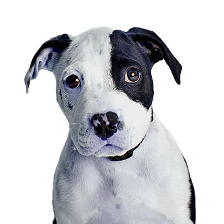

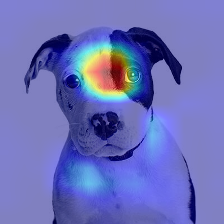

In [8]:
heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)
imgs.append(dog)
imgs.append(superimposed_img)

Observation
============

The above image shows that the network is looking at the forehead of the dog to classify it . Even though there are small patches of the heatmap around it's neck but the majority of the neurons around it's forehead fired .
This layer is the last convolution layer of the network . But the heatmap is not this perfect in the layers before it as it's comparatively far than the output layer . Let's try to perform the same experiments in few other layers and analyze the output 


# Gradcam on the Last -1 convolution Layer 

180
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


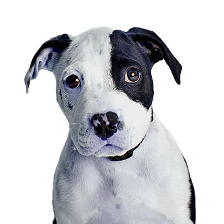

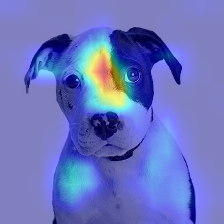

In [9]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv2")



import keras.backend as K
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  
  
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)



heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)
imgs.append(superimposed_img)


Did you observe that ?

This time the heatmap is little stretched and it looks at area between the nose of the dog and the forehead. This was expected to happen as this is the layer on which another convolution happened to get the output which was more refined .

# Now let's run the same experiment on n-2 convolution layer 

180
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


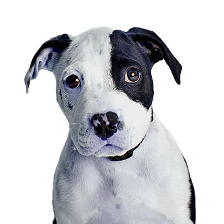

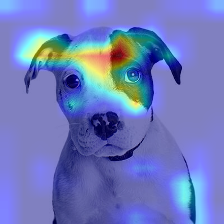

In [10]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv1")



import keras.backend as K
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  
  
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)



heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)
imgs.append(superimposed_img)


Can we see the huge difference in the visualization ? This layer looks at the ear as well along with the area between nose and forehead . It also have some activating region around it's left leg . This visualization is good enough to explain how the gradcam works and how can we visualize the effect of each convolution layer on the output prediction

How ever i am planning to run the network for 2 more layers far from the output layer to see how much it deviates

180
(?, 28, 28, 512)
(512,)
(28, 28, 512)
(28, 28)


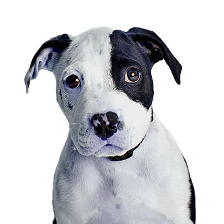

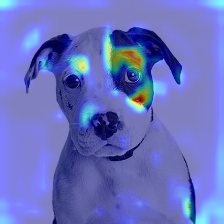

In [11]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block4_conv3")



import keras.backend as K
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  
  
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)



heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)
imgs.append(superimposed_img)


Observations
============

Now the network is looking at so many places of the object. This is so beacuse may be at this layer the network trying to learn the textures or patterns and not the object . 

Let's run it for one last layer and see what happens 

180
(?, 28, 28, 512)
(512,)
(28, 28, 512)
(28, 28)


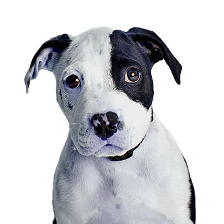

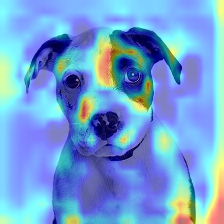

In [12]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block4_conv2")



import keras.backend as K
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  
  
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)



heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)
imgs.append(superimposed_img)

There we go . The patches are all over . The reason is definitely that in this layer the network tries to learn not the object but probabbly the texture, pattern or parts of the object . That means if we run gradcam on layers far from output layer we may not get the actual picture of the prediction . We may not see anything for the first few layers.

180
(?, 28, 28, 512)
(512,)
(28, 28, 512)
(28, 28)


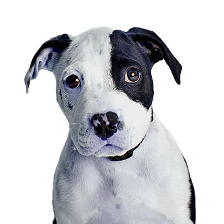

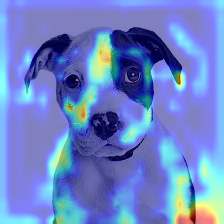

In [13]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block4_conv1")



import keras.backend as K
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  
  
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)



heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)
imgs.append(superimposed_img)


#Now let's visualize all the gradcams together to see how different each superimposed image is from others 

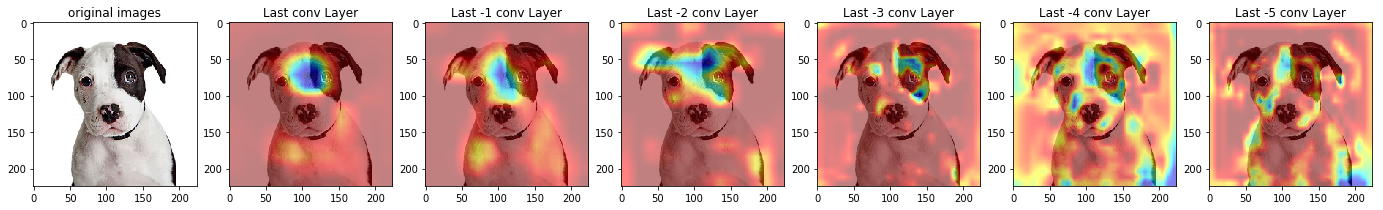

In [32]:
h, w = 5, 5       # for raster image
nrows, ncols = 1, 7  # array of sub-plots
figsize = [24,24]     # figure size, inches

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for i, axi in enumerate(ax.flat):
    if i == 0:
      axi.set_title("original images")
    else:
        if i ==1:
          axi.set_title("Last conv Layer")
        else:
          axi.set_title("Last -" + str(i-1) + " conv Layer")
    axi.imshow(imgs[i])

Summary
=======

The time overhead for calculating higher-order derivatives remains of the same order as Grad-CAM, as only the diagonal terms are used (no cross higher-order derivatives). If we pass the penultimate layer scores through an exponential function and the last layer has only linear or ReLU activation functions, the calculation of higher-order derivatives becomes trivial.Similar to Grad-CAM, to generate the final saliency maps,we carry out pointwise multiplication of the upsampled (to image resolution) saliency map Lc with the pixel-space visualization generated by Guided Backpropagation (Source : https://arxiv.org/pdf/1710.11063.pdf)

Part-2 
========

Objective 
=========

The Objective of this usecase is to upload an image which contains a man wearing a spectacles . Our job is to show heatmap on the sunglass .

Why are we doing so ? 
----------------------
This exercise is not to show how gradcam works but to demonstrate that we can create heatmap for different objects when an image contains many . We just have to tell the network where it should look and it looks for us .

But why is it important ? 
-------------------------
Remember when we spoke about the softmax function which penalizes the 2nd , 3rd ... positive values by lowering its value a lot . Now what if there are images in whcih we want to visualize the object which is not being shown due to the strong presence of another ? For example in a farm there are horses , hat , brick walls etc and we want to exactly show the horse which is near to the wall ? But the network always predicts the hat as that's very much evident ?

If we use this technique then we can now visualize any object in the image as long as the model is trained using that object . Let's see how it works in this case 

# Connect to Google drive for uploading the image to the colab 

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Upload the image 

In [119]:
from google.colab import drive
drive.mount('/gdrive')
import glob

file_path = glob.glob("/gdrive/My Drive/man.jpg")
# for file in file_path:
#     print(file)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Steps
======

1. Load Image on which we will run the Gradcam. Please remember to load an image which belongs to one of the Imagenet classes that the VGG model is trained on

2. Rescale image to 224x224x3 (VGG's expectation, why?) - The Size of the Image has to be 224 x 224 , as VGG contains Fully Connected layers, hence the parameters are fixed for those layers which requires fixed size image for it .
3. Use expand_dims to convert image to a batch of size 1. The Function requires a wrapper around the image , hence to process a single image the only way is to define the Batch sise as 1.
4. Preprocesing normalizes our input image by subtracting mean RGB values. This is required otherwise the values of the image and heatmap will not be in the same range .
5. We get the predictions for the test image( the one we uploaded)
6. We take the index of the object that we want to visualize 
7. Take output from the final convolutional layer
8. Display the class index of the predicted class
9. Set the convolution layer on which we will run gradcam
10.Compute the gradient of the class output value with respect to the feature map
11.Pool the gradients over all the axis leaving out the channel dimension
12. Weigh the output feature map with the computed gradient values
13.Average the weighted feature map along the channel dimension resulting in a heat map of size 14x14
14. Normalize the heat map to make the values between 0 and 1
15.Resize the heatmap as per the shape of the image
16.multiply 255 to the heatmap
17.Apply the Color Map to the heat map
18.Define the weights for image and heatmap which will be used for superimposing . This would give us an image which will show where exactly the model is looking at for predicting the class or in other words what region of the image is activating highest for the class
19.Show the Image and superimposed image



836
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


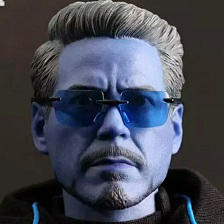

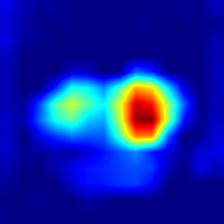

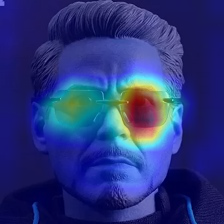

In [124]:
man = io.imread(file)
#io.imshow(man)
man = cv2.resize(man, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(man)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


preds = model.predict(x)
#class_idx = np.argmax(preds[0])
class_idx =836
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")



import keras.backend as K
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  
  
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)



heatmap = cv2.resize(heatmap, (man.shape[1], man.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(man, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( man)
cv2_imshow( heatmap)
cv2_imshow(superimposed_img)


Observation 
===========

The heat map is shown on top of the sunglasses . This clearly shows that we can run gradcam on any object inside the image as long as the model is trained with that object (in this case VGG network is trained on sunglasses).This is very useful in many of the real life scenario and a very effective solution for interprete the model based on the business requirement .

